> **Dataset:** Breast Cancer Dataset by UCI Machine Learning Repository (Asuncion and Newman, 2007)
\
*The Class Samples are either Benign (value = 2) or Malignant (value = 4)*

In [ ]:
# @title Import necessary libraries
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation
import tensorflow as tf      # For deep learning model creation
from tensorflow import keras # For high-level API to build deep learning models
import torch                 # For PyTorch operations

# Load the dataset
cell_df = pd.read_csv('/content/sample_data/cell_samples.csv')

In [ ]:
# @title Data Preprocessing using Pandas and Numpy
# Replace missing values and convert columns to appropriate data types
cell_df.replace('?', np.nan, inplace=True)
cell_df.dropna(inplace=True)
cell_df['BareNuc'] = cell_df['BareNuc'].astype(int)

# Separate features and target variable
X = cell_df.drop(['ID', 'Class'], axis=1).values
y = cell_df['Class'].values

In [ ]:
# @title Use Scikit-learn for data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using Scikit-learn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# @title A simple neural network model using Keras with TensorFlow backend
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train == 4, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred_keras = model.predict(X_test_scaled).round().astype(int).flatten()

# Calculate evaluation metrics using Scikit-learn
accuracy = accuracy_score(y_test == 4, y_pred_keras)
conf_matrix = confusion_matrix(y_test == 4, y_pred_keras)
report = classification_report(y_test == 4, y_pred_keras)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Epoch 1/10
16/16 [==============================] - 1s 16ms/step - loss: 0.6101 - accuracy: 0.7841 - val_loss: 0.5875 - val_accuracy: 0.7818
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.5232 - accuracy: 0.8432 - val_loss: 0.5117 - val_accuracy: 0.7636
Epoch 3/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8574 - val_loss: 0.4434 - val_accuracy: 0.8000
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8778 - val_loss: 0.3840 - val_accuracy: 0.8000
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.9124 - val_loss: 0.3308 - val_accuracy: 0.8545
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2710 - accuracy: 0.9470 - val_loss: 0.2843 - val_accuracy: 0.9273
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.2312 - accuracy: 0.9552 - val_loss: 0.2438 - val_accuracy: 0.9455
Epoch 8/10
16/16 [=

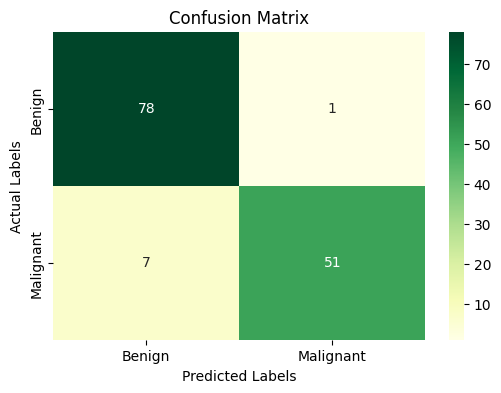

In [ ]:
# @title Plot the confusion matrix using Matplotlib and Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()